# Problem Set 3

See “Check Your Understanding” from [Control Flow](../python_fundamentals/control_flow.ipynb), [Functions](../python_fundamentals/functions.ipynb), and [Introduction to Numpy](../scientific/numpy_arrays.ipynb)

## Question 1

Write a for loop that uses the lists of cities and states to print a message saying `“{city} is in {state}”`, where `{city}` and `{state}` are replaced by different values on each iteration.  You are *not* allowed to use `zip`.

In [1]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

for index, city in enumerate(cities):
    state = states[index]
    print(f"{city} is in {state}")

Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Now, do the same thing with a `for` loop using `zip`.

In [2]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

for city,state in zip(cities,states):
    print(f"{city} is in {state}")

Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Write a function that takes in a tuple as `(city, state)` and returns a string  `“{city} is in {state}”` with the values substituted.

In [3]:
def return_string(city,state):
    return f"{city} is in {state}"

Now, use your function and a `comprehension` to print out `“{city} is in {state}”` as we did above.

In [4]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

[print(return_string(city,state)) for city,state in zip(cities,states)];

Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


## Question 2

This exercise explores the concept of higher order functions, or functions
that can be an input or output of another function.

Below is code that implements a version of the generalized Cobb-Douglas production function which takes the form $ F(K, L) = z K^{\alpha_1} L^{\alpha_2} $.

It takes as an argument `alpha_1`, `alpha_2`, and `z` and then
*returns a function* that implements that parameterization of the
Cobb-Douglas production function.

In [5]:
def cobb_douglas_factory(alpha_1, alpha_2, z=1.0):
    """
    Return a function F(K, L) that implements the generalized Cobb-Douglas
    production function with parameters alpha_1, alpha_2, and z

    The returned function takes the form F(K, L) = z K^{\alpha_1} L^{\alpha_2}
    """
    # I'm defining a function inside a function
    def return_func(K, L):
        return z * K**alpha_1 * L**alpha_2

    # Notice I'm returning a function! :mind_blown:
    return return_func

We can use this function in two steps:

1. Call it with `alpha_1`, `alpha_2`, and `z` and get a function in return.  
1. Call the returned function with values of `K` and `L`.  


Here’s how we would repeat the first Cobb-Douglas example from above:

In [6]:
# step 1
F2 = cobb_douglas_factory(0.33, 1-0.33)

# step 2
F2(1.0, 0.5)

0.6285066872609142

Now, it is your turn…

Re-write the `returns_to_scale` function above to accept an additional argument
`F` that represents a production function. The function should take in `K` and `L`
and return output.

We’ve written some code below to get you started.

In [7]:
def returns_to_scale2(F, K, L, gamma):
    # call F with K and L
    Y1=F(K,L)
    # scale K and L by gamma and repeat
    Y2=F(gamma*K,gamma*L)
    # compute returns to scale
    Y_ratio = Y2 / Y1
    return Y_ratio / gamma

Test out your new function using the original `F2` that we defined above and
using the `cobb_douglas` function defined earlier in the lecture.

Do you get the same answer?

In [8]:
returns_to_scale2(F2,1.0, 0.5,2)

1.0

## Question 3

Let’s use our `cobb_douglas_factory` and `returns_to_scale2` functions
to study returns to scale.

What are the returns to scale when you set `alpha_1 = 0.3` and `alpha_2 = 0.6`?

In [9]:
# test with alpha_1 = 0.3 and alpha_2 = 0.6
F3 = cobb_douglas_factory(0.3, 0.6)
returns_to_scale2(F3,1.0, 0.5,2)

0.9330329915368075

What about when you use `alpha_1 = 0.4` and `alpha_2 = 0.65`?

In [10]:
# test with alpha_1 = 0.4 and alpha_2 = 0.65
F3 = cobb_douglas_factory(0.4, 0.65)
returns_to_scale2(F3,1.0, 0.5,2)

1.0352649238413774

What do returns to scale have to do with the quantity $ \alpha_1 + \alpha_2 $? When will returns to scale be greater or less than 1?

When $\alpha_1+\alpha_2>1$, the returns to scale will be greater than 1, and when $\alpha_1+\alpha_2<1$, the returns to scale will be less than 1.

## Question 4

Take a production function of only labor, `L`, with the following form

$$
f(L) = \begin{cases} L^2 & \text{ for } L \in [0, 1)\\
                    \sqrt{L} & \text{ for } L \in [1, 2]
        \end{cases}
$$

Write a function to calculate the marginal product of labor (MPL) numerically by using a method similar to what we did in class.

In [11]:
from math import sqrt

def products(L):
    if 0<=L<1:
        return L**2
    elif 1<=L<=2:
        return sqrt(L)

def marginal_products(L, epsilon):
    mpl = (products(L + epsilon) - products(L)) / epsilon
    return mpl

print(marginal_products(1,1e-4))

0.49998750062396624


Plot the MPL for $ L \in [0,2] $  (you can choose some sort of grid over those numbers with `np.linspace`).

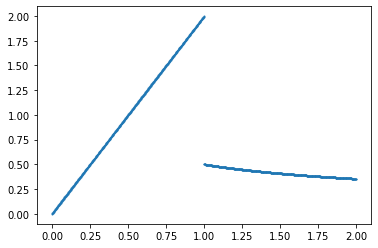

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Ls=np.linspace(0,2,1000,endpoint=False)
mpls=[marginal_products(L,1e-4) for L in Ls]
fig,ax=plt.subplots()
ax.scatter(Ls,mpls,s=1);

Consider the scenario where you increase the scale of production by a factor of 10 percent more labor. Plot the returns to scale for a grid on $ L \in [0, 1.5] $.
*Hint:* For this, you may need to write your own version of the `returns_to_scale` function specific to this production function or carefully use the one above. Either way of implementation is fine.

C:\Users\bayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


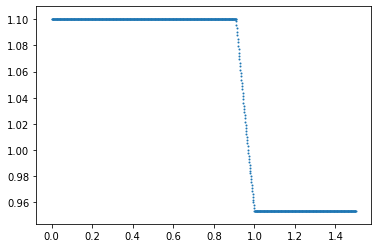

In [13]:
def returns_to_scale4(F, L, gamma):
    # call F with L
    Y1=F(L)
    # scale L by gamma and repeat
    Y2=F(gamma*L)
    # compute returns to scale
    Y_ratio = Y2 / Y1
    return Y_ratio / gamma

Ls=np.linspace(0,1.5,1000)
rts=[returns_to_scale4(products,L,1.1) for L in Ls]
fig,ax=plt.subplots()
ax.scatter(Ls,rts,s=1);

Compare these returns to the scale of the Cobb-Douglas functions we have worked with.

Cobb-Douglas function has the return to scale equal to $ \alpha_1 + \alpha_2 $. The standard one with $ \alpha_1 + \alpha_2 = 1$ and the return to scale is 1. Here, this function has different return to scale, depending on its labor.

## Question 5

Take the following definition for `X`. How would you do to extract the array `[[5, 6], [7, 8]]`?

In [14]:
import numpy as np
X = np.array([[[1, 2, 3], [3, 4, 5]], [[5, 6, 7], [7, 8, 9]]])
print(X[1, :, :2])

[[5 6]
 [7 8]]


## Question 6

Let’s revisit a bond pricing example we saw in [Control flow](../python_fundamentals/control_flow.ipynb).

We price the bond today (period 0). Starting from period 1, this bond pays back a coupon $ C $
every period until maturity $ N $. At the end of maturity, this bond pays principal back as well.

Recall that the equation for pricing a bond with coupon payment $ C $,
face value $ M $, yield to maturity $ i $, and periods to maturity
$ N $ is

$$
\begin{align*}
    P &= \left(\sum_{n=1}^N \frac{C}{(i+1)^n}\right) + \frac{M}{(1+i)^N} \\
        &= C \left(\frac{1 - (1+i)^{-N}}{i} \right) + M(1+i)^{-N}
\end{align*}
$$

In the code cell below, we have defined variables for `i`, `M` and `C`.

You have two tasks:

1. Define a numpy array `N` that contains all maturities between 1 and 10. (*Hint:* look at the `np.arange` function)  
1. Using the equation above, determine the price of bonds with all maturity levels in your array.  

In [15]:
i = 0.03
M = 100
C = 5

# Define array here
N=np.arange(1,11)

# price bonds here
P=C*((1-(1+i)**(-N))/i)+M*(1+i)**(-N)
print(P)

[101.94174757 103.82693939 105.65722271 107.43419681 109.15941437
 110.83438289 112.46056591 114.03938438 115.57221784 117.06040567]
